<center>
<img src="https://habrastorage.org/files/fd4/502/43d/fd450243dd604b81b9713213a247aa20.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

Author: [Yury Kashnitskiy](https://yorko.github.io). Translated by [Sergey Oreshkov](https://www.linkedin.com/in/sergeoreshkov/). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center> Assignment #8 (demo)

## <center> Implementation of online regressor

Here we'll implement a regressor trained with stochastic gradient descent (SGD). Fill in the missing code. If you do evething right, you'll pass a simple embedded test.

## <center>Linear regression and Stochastic Gradient Descent

In [232]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error, log_loss, roc_auc_score
from sklearn.model_selection import train_test_split
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Implement class `SGDRegressor`. Specification:
- class is inherited from `sklearn.base.BaseEstimator`
- constructor takes parameters `eta` – gradient step ($10^{-3}$ by default) and `n_epochs` – dataset pass count (3 by default)
- constructor also creates `mse_` and `weights_` lists in order to track mean squared error and weight vector during gradient descent iterations
- Class has `fit` and `predict` methods
- The `fit` method takes matrix `X` and vector `y` (`numpy.array` objects) as parameters, appends column of ones to  `X` on the left side, initializes weight vector `w` with **zeros** and then makes `n_epochs` iterations of weight updates (you may refer to this [article](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-8-vowpal-wabbit-fast-learning-with-gigabytes-of-data-60f750086237) for details), and for every iteration logs mean squared error and weight vector `w` in corresponding lists we created in the constructor. 
- Additionally the `fit` method will create `w_` variable to store weights which produce minimal mean squared error
- The `fit` method returns current instance of the `SGDRegressor` class, i.e. `self`
- The `predict` method takes `X` matrix, adds column of ones to the left side and returns prediction vector, using weight vector `w_`, created by the `fit` method.

In [242]:
class SGDRegressor(BaseEstimator):
    
    def __init__(self, eta = 10e-3, n_epochs = 3):
        self.eta = eta
        self.n_epochs = n_epochs
        self.mse_ = []
        self.weights_ = []
        self.w_ = np.zeros(2)
                
    def fit(self, X, y):
        X = np.c_[np.ones(np.size(X,0)), X]
        l = np.size(X,0)
        w = np.zeros(2)
        
        for epoch in tqdm(range(self.n_epochs)):
#             print(f'Epoch {epoch}/{self.n_epochs}:')
            w0 = 0
            w1 = 0
            for i in range(l):
                w0 = w[0]
                w1 = w[1]
#                 print(f'before {w0}, {w1}, {w}')
                w[0] = w0 + ( self.eta * (y[i] - w0 - ( w1 * X[i,1] ) ) )
                w[1] = w1 + ( self.eta * (y[i] - w0 - ( w1 * X[i,1] ) ) * X[i,1] )
#                 print(f'after {w0}, {w1}, {w}')
                      
#             print(f'w={w}')
            mse = 0
            for i in range(l):
                mse += ( y[i] - ( w[0] + ( w[1] * X[i,1] ) ) ) ** 2

#             print(f'mse * 2 / l = {mse * 2 / l}')
            self.mse_.append(mse * 2 / l)
#             print(f'mse_={self.mse_}')
            self.weights_.append(w.tolist())
#             print(f'self.weights_={self.weights_}')
    
#             print(f'MSE={self.mse_[epoch]}')
        self.w_ = self.weights_[np.argmin(self.mse_)]
#         print(f'np.argmin(self.mse_)={np.argmin(self.mse_)}')
        print(f'Weights which produce minimal mean squared error={self.w_}')
        print(f'Done!')
        return self
                  
    def predict(self, X):
        X = np.c_[np.ones(np.size(X,0)), X]
        y_pred = np.zeros(np.size(X,0))
        for i in range(np.size(X,0)):
            y_pred[i] = self.w_[0] + ( self.w_[1] * X[i,1] )        
        return y_pred                

In [142]:
X_train = np.random.randint(10, size=18000)
noise = np.random.normal(0, .1, X_train.shape)
y_train = (X_train * 0.8) + 5 + noise

# print(X_train)
# print(y_train)

In [143]:
sgdr_object = SGDRegressor()
sgdr_object.fit(X_train, y_train)
y_pred = sgdr_object.predict(X_train)
print(sgdr_object.mse_, sgdr_object.weights_)

Weights which produce minimal mean squared error=[4.99497297284004, 0.8028967246949344]
Done!
[0.02019546785262841, 0.02019546785262841, 0.02019546785262841] [[4.99497297284004, 0.8028967246949344], [4.99497297284004, 0.8028967246949344], [4.99497297284004, 0.8028967246949344]]


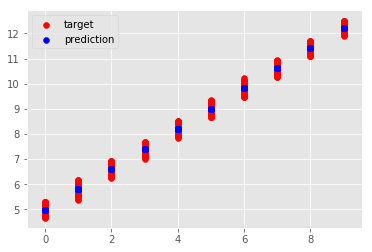

In [144]:
plt.scatter(X_train, y_train, c='red', label='target')
plt.scatter(X_train, y_pred, c='blue', label='prediction')
plt.legend()
plt.show();

Let's test out the algorithm on height/weight data. We will predict heights (in inches) based on weights (in lbs).

In [145]:
data_demo = pd.read_csv('../input/weights_heights.csv')

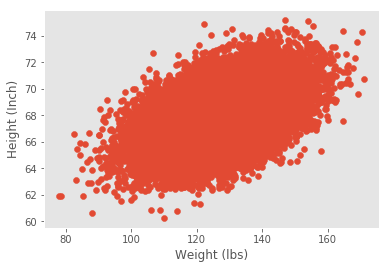

In [146]:
plt.scatter(data_demo['Weight'], data_demo['Height']);
plt.xlabel('Weight (lbs)')
plt.ylabel('Height (Inch)')
plt.grid();

In [147]:
X, y = data_demo['Weight'].values, data_demo['Height'].values

Perform train/test split and scale data.

In [148]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                     test_size=0.3,
                                                     random_state=17)

In [149]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape([-1, 1]))
X_valid_scaled = scaler.transform(X_valid.reshape([-1, 1]))

Train created `SGDRegressor` with `(X_train_scaled, y_train)` data. Leave default parameter values for now.

In [243]:
model = SGDRegressor(eta=10e-7, n_epochs=1000)
model.fit(X_train_scaled, y_train)
# [68.0348382579771, 0.9960124406860034] SGDRegressor()
# [67.98909100860557, 0.9508085800105812] SGDRegressor(eta=0.0001, n_epochs=100)
# [67.98930803735492, 0.9454500258747377] SGDRegressor(eta=1e-06, n_epochs=1000)

100%|██████████| 1000/1000 [02:31<00:00,  6.68it/s]

Weights which produce minimal mean squared error=[67.98930803735492, 0.9454500258747377]
Done!


SGDRegressor(eta=1e-06, n_epochs=1000)

Draw a chart with training process  – dependency of mean squared error from the i-th SGD iteration number.

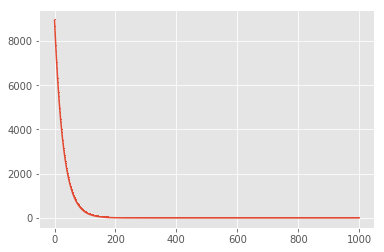

In [275]:
plt.plot(range(model.n_epochs), model.mse_, marker=',');

Print the minimal value of mean squared error and the best weights vector.

In [238]:
min(model.mse_), model.w_
# (5.439542982545095, [68.0348382579771, 0.9960124406860034])
# (5.430327477240902, [67.98909100860557, 0.9508085800105812])

(5.430327477240902, [67.98909100860557, 0.9508085800105812])

Draw chart of model weights ($w_0$ and $w_1$) behavior during training.

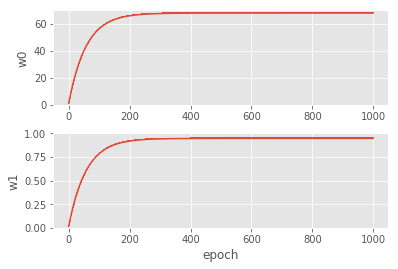

In [288]:
fig, axs = plt.subplots(2, 1)
fig.subplots_adjust(hspace=0.3)
axs[0].plot(range(model.n_epochs), np.asarray(model.weights_)[:, 0], marker=',')
axs[0].set_ylim(0, 70)
axs[0].set_ylabel('w0')

axs[1].plot(range(model.n_epochs), np.asarray(model.weights_)[:, 1], marker=',')
axs[1].set_ylim(0, 1)
axs[1].set_xlabel('epoch')
axs[1].set_ylabel('w1')
plt.show()

Make a prediction for hold-out  set `(X_valid_scaled, y_valid)` and check MSE value.

In [244]:
y_valid_SGD_pred = model.predict(X_valid_scaled)
# sgd_holdout_mse = 10
sgd_holdout_mse = mean_squared_error(y_valid, y_valid_SGD_pred)
print(sgd_holdout_mse)
# 2.6739798305683347
# 2.670657353153426
# 2.670827887935785

2.670827887935785


Do the same thing for `LinearRegression` class from `sklearn.linear_model`. Evaluate MSE for hold-out set.

In [245]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_valid_linreg_pred = linreg.predict(X_valid_scaled)
linreg_holdout_mse = mean_squared_error(y_valid, y_valid_linreg_pred)
print(linreg_holdout_mse)
# linreg_holdout_mse = 9

2.670830767667635


In [246]:
try:
    assert (sgd_holdout_mse - linreg_holdout_mse) < 1e-4
    print('Correct!')
except AssertionError:
    print("Something's not good.\n Linreg's holdout MSE: {}"
          "\n SGD's holdout MSE: {}".format(linreg_holdout_mse, 
                                            sgd_holdout_mse))

Correct!
